## **Trabajo Final - Primera Entrega**

### **Universidad Autónoma de Occidente**
### *Facultad de Ingeniería y Ciencias Básicas*
### **Curso**: Aprendizaje Automático
### **Profesor**: Francisco José Mercado
### **Estudiantes**:
*   Juan Manuel García Ortiz
*   Nicolás Lozano Mazuera
*   Sebastián Urquijo Buitrago





## **Enlance de Descarga (Kaggle)**

[Enlace de Descarga del Dataset](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?resource=download)



## **Descripción del Conjunto de Datos**


Este conjunto de datos se basa en comprender la relación
entre las especificaciones técnicas de los teléfonos móviles y su precio de venta en el mercado. La iniciativa surge de la empresa de telefonía móvil de Bob (Kaggle), que busca establecer una estrategia de precios competitiva frente a actores consolidados como Apple y Samsung. Ante la complejidad de este mercado, se tiene la necesidad de un obtener un enfoque basado en datos para la **estimación de precios**.

El conjunto de datos contiene diversas características de teléfonos móviles, como la *cantidad de memoria RAM*, *la capacidad de almacenamiento interno y otras especificaciones relevantes*.


## **Objetivo**


Identificar patrones o caracteristicas que permitan **predecir** el rango de precios al que un nuevo dispositivo debería comercializarse, en lugar de predecir un precio exacto.

## **Problema de investigación**



Este proyecto de Machine Learning busca, por lo tanto, desarrollar un modelo predictivo capaz de clasificar los teléfonos móviles en diferentes categorías de precios (por ejemplo, bajo, medio, alto) basándose en sus especificaciones técnicas. La información obtenida de este análisis será crucial para la toma de decisiones estratégicas en la fijación de precios de los productos moviles.

# EDA

# Importamos Librerias


In [643]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, SelectKBest, f_classif, chi2
from sklearn.ensemble import RandomForestClassifier

from google.colab import drive


```

# Obtenemos data

In [644]:
drive.mount('/content/drive')
path = '/content/drive/MyDrive/ML/Cellphones/'
filename = "train.csv"
train_data = pd.read_csv(path + filename)

train_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [645]:
train_data.shape

(2000, 21)

# Analizamos Data de Entrenamiento

In [646]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [647]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [648]:
print(train_data.dtypes)

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object


# Creamos copia Modificada

In [649]:
train_data_mod = train_data.copy()

# Editamos columnas con titulos poco descriptivos

In [650]:
train_data_mod.rename(columns={'blue': 'bluetooth',
                                'fc': 'front_camera_res',
                                'm_dep': 'depth',
                                'mobile_wt': 'weight',
                                'pc': 'rear_camera_res',
                                'sc_h': 'screen_height',
                                'sc_w': 'screen_width'}, inplace=True)
train_data_mod.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim',
       'front_camera_res', 'four_g', 'int_memory', 'depth', 'weight',
       'n_cores', 'rear_camera_res', 'px_height', 'px_width', 'ram',
       'screen_height', 'screen_width', 'talk_time', 'three_g', 'touch_screen',
       'wifi', 'price_range'],
      dtype='object')

In [651]:
train_data_mod.shape

(2000, 21)

# Encontramos Duplicas

In [652]:
train_data_mod.duplicated().sum()

np.int64(0)

Ya que no hay duplicas de registros, procedemos.

# Encontramos valores nulos

In [653]:
missing_counts = train_data_mod.isnull().sum()

if missing_counts.sum() == 0:
    print("✅ No missing values found in any column.")
else:
    missing_counts[missing_counts > 0]\
        .sort_values()\
        .plot(kind='barh', title='Missing values per column')
    plt.xlabel('Number of missing entries')
    plt.tight_layout()
    plt.show()

✅ No missing values found in any column.


Ya que no hay nulos, procedemos

# Analizamos valores unicos por columna para determinar si son variables catagoricos

In [654]:
train_unique_counts = train_data.nunique()
print("Train set unique counts per column:")
print(train_unique_counts)

Train set unique counts per column:
battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64


In [655]:
unique_counts = train_data_mod.nunique()
threshold = 10  # tweak this cutoff as needed

likely_categorical = unique_counts[unique_counts <= threshold]\
    .sort_values()

print(f"Columnas probablemente-categoricas(≤ {threshold} valores unicos):")
print(likely_categorical)

Columnas probablemente-categoricas(≤ 10 valores unicos):
bluetooth        2
dual_sim         2
four_g           2
three_g          2
wifi             2
touch_screen     2
price_range      4
n_cores          8
depth           10
dtype: int64


De las columnas que son posiblemente categoricas, la mayoria son binaria, excepto price_range, n_cores, y depth. Sabemos que depth es la medida del grosor del telefono, por lo que la descartamos como categorica.

# Graficar Rango de Precios para familiciarnos con la target column

<Axes: xlabel='price_range'>

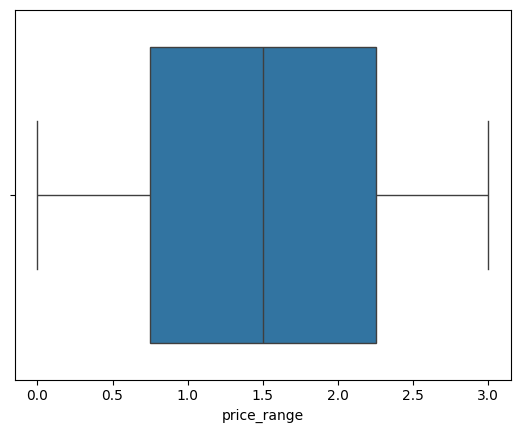

In [656]:
sns.boxplot(x=train_data_mod['price_range'])

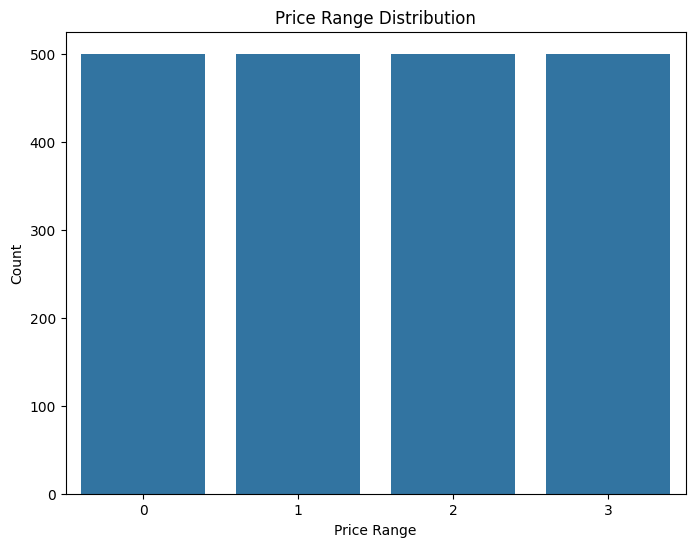

In [657]:
plt.figure(figsize=(8, 6))
sns.countplot(x='price_range', data=train_data_mod)
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()


Notamos que las clases de rangos de precio estan perfectamente distribuidas

# Analizamos anomalias en todas las columnas calculando IQR y limites de anomalias

In [658]:
numerico = train_data_mod.select_dtypes(include=[np.number])

Q1  = numerico.quantile(0.25)
Q3  = numerico.quantile(0.75)
IQR = Q3 - Q1

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
anomalies_df = (numerico < lower_bound) | (numerico > upper_bound)
cuenta_de_anomalias = anomalies_df.sum()
pd.DataFrame({
    'Q1': Q1,
    'Q3': Q3,
    'IQR': IQR,
    'Limite Bajo': lower_bound,
    'Limite Alto': upper_bound,
    'Cuenta de Anomalias': cuenta_de_anomalias
})


,Q1,Q3,IQR,Limite Bajo,Limite Alto,Cuenta de Anomalias
battery_power,851.75,1615.25,763.50,-293.500,2760.500,0
bluetooth,0.00,1.00,1.00,-1.500,2.500,0
clock_speed,0.70,2.20,1.50,-1.550,4.450,0
dual_sim,0.00,1.00,1.00,-1.500,2.500,0
front_camera_res,1.00,7.00,6.00,-8.000,16.000,18
four_g,0.00,1.00,1.00,-1.500,2.500,0
int_memory,16.00,48.00,32.00,-32.000,96.000,0
depth,0.20,0.80,0.60,-0.700,1.700,0
weight,109.00,170.00,61.00,17.500,261.500,0
n_cores,3.00,7.00,4.00,-3.000,13.000,0


# 3 columnas tienen anomalias:
* front_camera_res, px_height y three_g:
- three_g es una clase binaria, por lo tanto no lo consideramos en este paso
- Procedemos a visualizar las otras dos columnas (front_camera_res y  px_height para entender los datos mas a fondo

# Descubrimos que ciertas columnas tienen un valor minimo de cero que intituivamente no deberian. Analizamos esos casos

In [659]:
print(f"Veces que screen_width es igual a 0: {train_data_mod[train_data_mod['screen_width'] == 0].shape[0]}")
print(f"Veces que px_height es igual a 0: {train_data_mod[train_data_mod['px_height'] ==0].shape[0]}")

print("Tendremos en cuenta como tratar estos valores proximamente")

Veces que screen_width es igual a 0: 180
Veces que px_height es igual a 0: 2
Tendremos en cuenta como tratar estos valores proximamente


# Outliers en front_camera_res

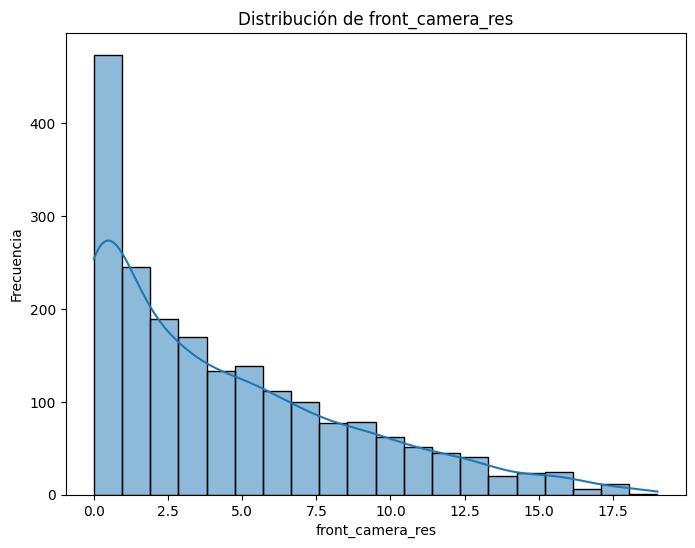

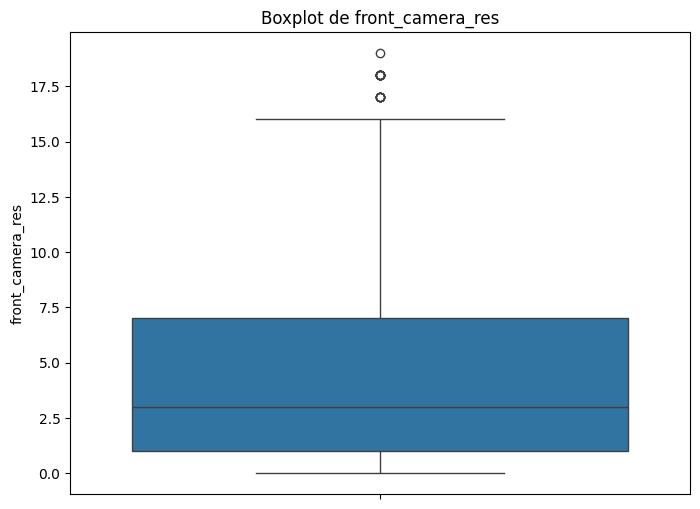

In [660]:
# Visualización de 'front_camera_res'
plt.figure(figsize=(8, 6))
sns.histplot(train_data_mod['front_camera_res'], kde=True)
plt.title('Distribución de front_camera_res')
plt.xlabel('front_camera_res')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de caja para 'front_camera_res'
plt.figure(figsize=(8, 6))
sns.boxplot(y=train_data_mod['front_camera_res'])
plt.title('Boxplot de front_camera_res')
plt.show()

In [661]:
outliers_front_camera_res = train_data_mod.loc[anomalies_df["front_camera_res"], "front_camera_res"]
print("Outlier values in front_camera_res:")
print(train_data_mod.loc[anomalies_df["front_camera_res"]])

Outlier values in front_camera_res:
      battery_power  bluetooth  clock_speed  dual_sim  front_camera_res  \
95             1137          1          1.0         0                18   
169            1569          0          2.8         1                17   
226            1708          1          2.4         1                18   
229            1689          0          1.8         0                17   
300            1937          1          1.7         0                17   
305            1348          0          2.0         0                18   
372            1703          1          1.5         1                17   
584             946          1          2.6         1                17   
1387           1533          1          1.1         1                18   
1406           1731          1          2.3         1                18   
1416           1448          0          0.5         1                18   
1549           1772          1          1.6         0           

Las anomalías en `front_camera_res` corresponden a valores elevados (17–19 MP) propios de dispositivos de gama alta, y no parecen errores de captura.  
Por lo tanto, en lugar de descartarlas, las vamos a "cappear" (winsorizar) para controlar su influencia en el modelo sin perder información legítima.


In [662]:
# 1) Recoge los límites para esta columna
lower_bound_front_camera_res = lower_bound["front_camera_res"]
upper_bound_front_camera_res = upper_bound["front_camera_res"]

# 2) Aplica clip directamente a toda la serie
train_data_mod["front_camera_res"] = train_data_mod["front_camera_res"].clip(lower=lower_bound_front_camera_res, upper=upper_bound_front_camera_res)

# 3) (Opcional) Verifica que ya no hay valores fuera de rango
outliers_after = train_data_mod[
    (train_data_mod["front_camera_res"] < lower_bound_front_camera_res) |
    (train_data_mod["front_camera_res"] > upper_bound_front_camera_res )
]
print("Anomalías restantes tras capado:", outliers_after.shape[0])

Anomalías restantes tras capado: 0


# Outliers en px_height

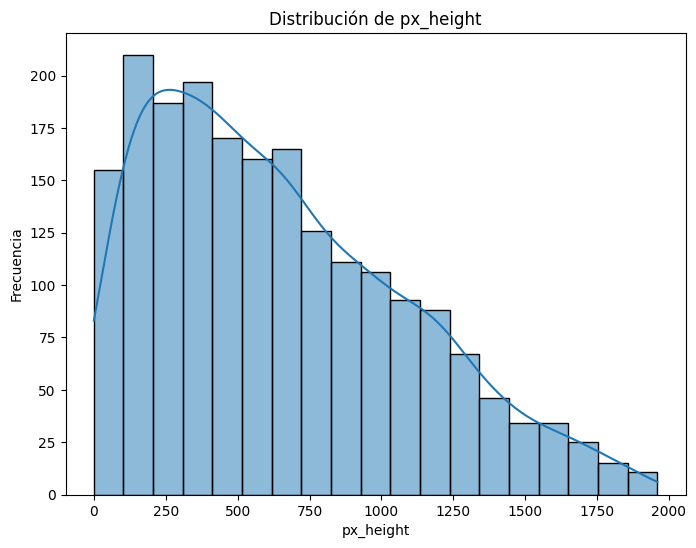

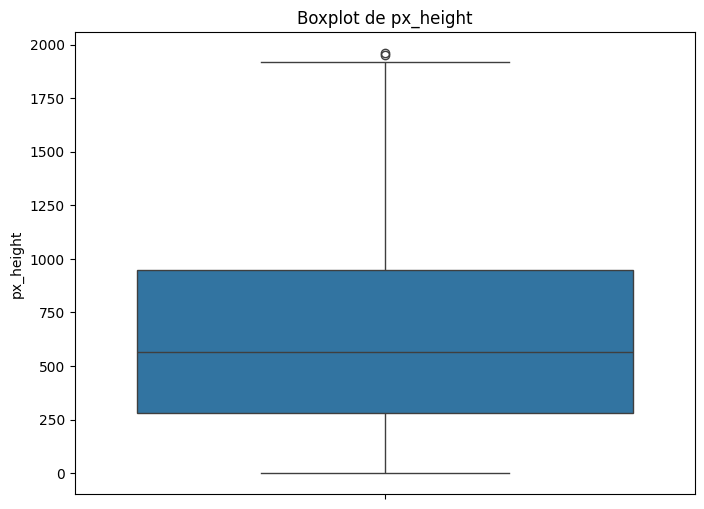

In [663]:
# Visualización de 'front_camera_res'
plt.figure(figsize=(8, 6))
sns.histplot(train_data_mod['px_height'], kde=True)
plt.title('Distribución de px_height')
plt.xlabel('px_height')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de caja para 'front_camera_res'
plt.figure(figsize=(8, 6))
sns.boxplot(y=train_data_mod['px_height'])
plt.title('Boxplot de px_height')
plt.show()

In [664]:
outliers_px_height = train_data_mod.loc[anomalies_df["px_height"], "px_height"]
print("Outlier values in px_height:")
print(train_data_mod.loc[anomalies_df["px_height"]])

Outlier values in px_height:
      battery_power  bluetooth  clock_speed  dual_sim  front_camera_res  \
988            1413          1          0.5         1                 4   
1771           1230          1          1.6         0                 0   

      four_g  int_memory  depth  weight  n_cores  ...  px_height  px_width  \
988        1          45    0.4     104        5  ...       1949      1994   
1771       1          48    0.7     111        7  ...       1960      1963   

       ram  screen_height  screen_width  talk_time  three_g  touch_screen  \
988   2973             17             8         15        1             0   
1771  1622             18            17         16        1             1   

      wifi  price_range  
988      1            3  
1771     1            2  

[2 rows x 21 columns]


Las anomalías en `px_height` corresponden a valores que exeden el limite alto calculado con los IQRs, pero debido a sus valores realistas, no parecen errores de captura.  
Por lo tanto, en lugar de descartarlos, las vamos a "cappear" (winsorizar) para controlar su influencia en el modelo sin perder información legítima.

In [665]:
# 1) Recoge los límites para esta columna
lower_bound_px_height = Q1["px_height"] - 1.5 * IQR["px_height"]
upper_bound_px_height = Q3["px_height"] + 1.5 * IQR["px_height"]

# 2) Aplica clip directamente a toda la serie
train_data_mod["px_height"] = train_data_mod["px_height"].clip(lower=lower_bound_px_height, upper=upper_bound_px_height)

# 3) (Opcional) Verifica que ya no hay valores fuera de rango
outliers_after = train_data_mod[
    (train_data_mod["px_height"] < lower_bound_px_height) |
    (train_data_mod["px_height"] > upper_bound_px_height)
]
print("Anomalías restantes tras capado:", outliers_after.shape[0])
print(f"Number of instances with px_height equal to 0: {train_data_mod[train_data_mod['px_height'] ==0].shape[0]}")

Anomalías restantes tras capado: 0
Number of instances with px_height equal to 0: 2


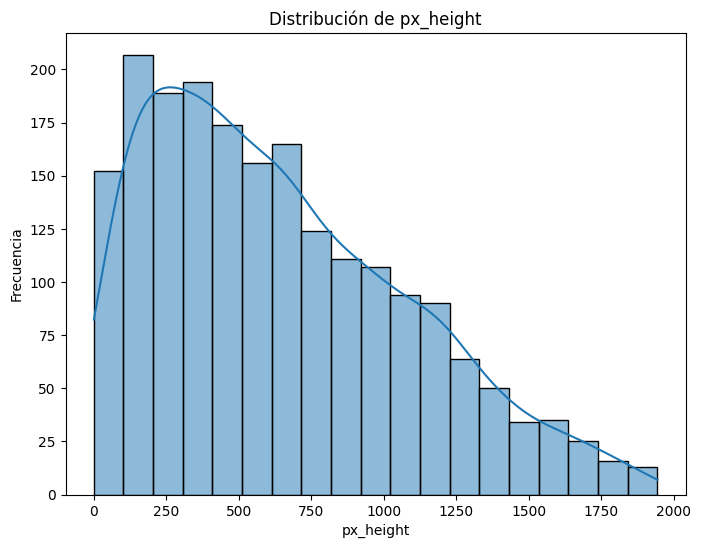

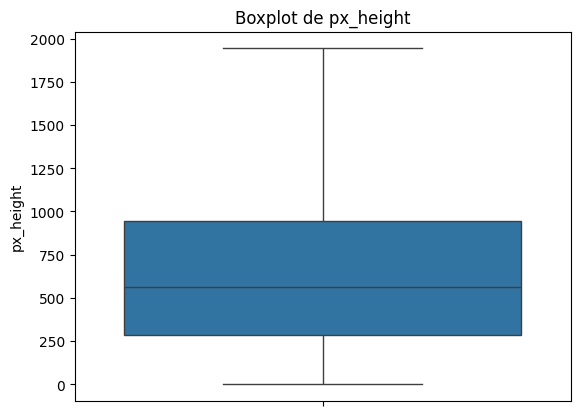

In [666]:
# Visualización de 'px_height'
plt.figure(figsize=(8, 6))
sns.histplot(train_data_mod['px_height'], kde=True)
plt.title('Distribución de px_height')
plt.xlabel('px_height')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de caja para 'px_height'
sns.boxplot(y=train_data_mod['px_height'])
plt.title('Boxplot de px_height')
plt.show()

Cabe resaltar que px_height  tambien tiene algunos valores bajos que no son posibles (modelos con px_height de menos de 20 pixeles no existen, aqui tenemos esos casos, hasta 0 pixeles), a menos que el dispositivo no cuente con pantalla.
Aqui comparamos los valores que consideramos irrealistas (px_height de 0 a 20 cms) con sus respectivas px_width:


In [667]:
sorted_df = train_data_mod.sort_values("px_height")
px_pairs = list(sorted_df[["px_height", "px_width"]].itertuples(index=False, name=None))
print(px_pairs)

[(0, 994), (0, 1987), (1, 926), (2, 660), (3, 629), (3, 1662), (4, 638), (4, 1351), (4, 743), (5, 1744), (6, 793), (7, 1294), (8, 896), (8, 1219), (9, 1944), (10, 1567), (11, 1020), (13, 1463), (14, 1256), (15, 525), (15, 1196), (17, 1084), (18, 1004), (18, 903), (18, 662), (19, 1923), (19, 501), (20, 745), (20, 756), (21, 562), (21, 832), (22, 519), (22, 1634), (23, 826), (24, 759), (26, 508), (27, 1722), (27, 774), (29, 1670), (30, 1350), (31, 1536), (32, 1509), (35, 991), (35, 1309), (35, 510), (36, 642), (38, 1682), (39, 1564), (39, 557), (40, 1435), (40, 1311), (42, 1161), (42, 507), (42, 1040), (42, 1262), (42, 807), (43, 627), (43, 1663), (44, 1118), (45, 1942), (46, 1069), (46, 908), (46, 562), (48, 1012), (48, 644), (50, 1105), (50, 1356), (51, 739), (52, 1082), (52, 539), (53, 1504), (55, 1020), (55, 583), (56, 760), (56, 1150), (56, 1931), (56, 997), (56, 527), (58, 1253), (58, 1353), (58, 963), (59, 575), (59, 1203), (59, 1215), (62, 846), (62, 544), (62, 581), (63, 566), (

Notamos que sus respectivos px_width existen en rangos que no indican correlacion que explique por que la px_height respectiva es un valor tan bajo. (0, 994), (0, 1987), (1, 926), (2, 660), (3, 629), (3, 1662), (4, 638), (4, 1351), (4, 743), (5, 1744), (6, 793), (7, 1294), (8, 896), (8, 1219), (9, 1944), (10, 1567).

Por lo tanto tratamos estas columnas como errores que seran cappeadas para minimizar su efecto:
* Procuramos no reemplazar los valores pequenos por medianas, pero los cappeamos a un valor "limite"

In [668]:
MINIMUM_PIXELS = 20
train_data_mod["px_height"] = train_data_mod["px_height"].clip(lower=MINIMUM_PIXELS)

Hacemos lo mismo con la columna screen_width que tiene el mismo caso de valores excesivamente pequenos

In [669]:
sorted_df = train_data_mod.sort_values("screen_width")
px_pairs = list(sorted_df[["screen_width", "screen_height"]].itertuples(index=False, name=None))
print(px_pairs)

[(0, 10), (0, 7), (0, 15), (0, 5), (0, 7), (0, 7), (0, 6), (0, 14), (0, 9), (0, 7), (0, 5), (0, 18), (0, 5), (0, 6), (0, 14), (0, 6), (0, 12), (0, 10), (0, 7), (0, 5), (0, 6), (0, 7), (0, 10), (0, 5), (0, 13), (0, 7), (0, 18), (0, 18), (0, 5), (0, 6), (0, 8), (0, 6), (0, 16), (0, 15), (0, 13), (0, 16), (0, 11), (0, 7), (0, 5), (0, 15), (0, 9), (0, 17), (0, 8), (0, 18), (0, 14), (0, 7), (0, 9), (0, 5), (0, 17), (0, 18), (0, 10), (0, 8), (0, 16), (0, 9), (0, 12), (0, 10), (0, 17), (0, 5), (0, 5), (0, 5), (0, 17), (0, 16), (0, 6), (0, 15), (0, 6), (0, 13), (0, 7), (0, 19), (0, 6), (0, 7), (0, 8), (0, 18), (0, 9), (0, 8), (0, 11), (0, 17), (0, 5), (0, 10), (0, 17), (0, 12), (0, 5), (0, 8), (0, 15), (0, 16), (0, 5), (0, 6), (0, 12), (0, 9), (0, 10), (0, 13), (0, 6), (0, 12), (0, 19), (0, 7), (0, 10), (0, 7), (0, 6), (0, 5), (0, 6), (0, 10), (0, 8), (0, 7), (0, 12), (0, 7), (0, 17), (0, 17), (0, 6), (0, 11), (0, 16), (0, 16), (0, 14), (0, 5), (0, 10), (0, 8), (0, 13), (0, 19), (0, 10), (0, 1


Notamos que sus respectivos screen_height existen en rangos que no indican correlacion que explique por que la screen_width respectiva es un valor tan bajo. (0, 994), (0, 1987), (1, 926), (2, 660), (3, 629), (3, 1662), (4, 638), (4, 1351), (4, 743), (5, 1744), (6, 793), (7, 1294), (8, 896), (8, 1219), (9, 1944), (10, 1567).

Por lo tanto tratamos estas columnas como errores que seran cappeadas para minimizar su efecto:
* Procuramos no reemplazar los valores pequenos por medianas, pero los cappeamos a un valor "limite"

In [670]:
MINIMUM_SCREEN_CMS = 2
train_data_mod["screen_width"] = train_data_mod["screen_width"].clip(lower = MINIMUM_SCREEN_CMS)

In [671]:
train_data_mod.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera_res,four_g,int_memory,depth,weight,n_cores,...,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.29400,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.242000,1251.515500,2124.213000,12.306500,6.052000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.29602,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.543828,432.199447,1084.732044,4.213245,4.035274,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.00000,0.000000,2.000000,0.100000,80.000000,1.000000,...,20.000000,500.000000,256.000000,5.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.00000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.00000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.00000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,16.00000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1944.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Analisis univariado de distribuciones para variables continuas

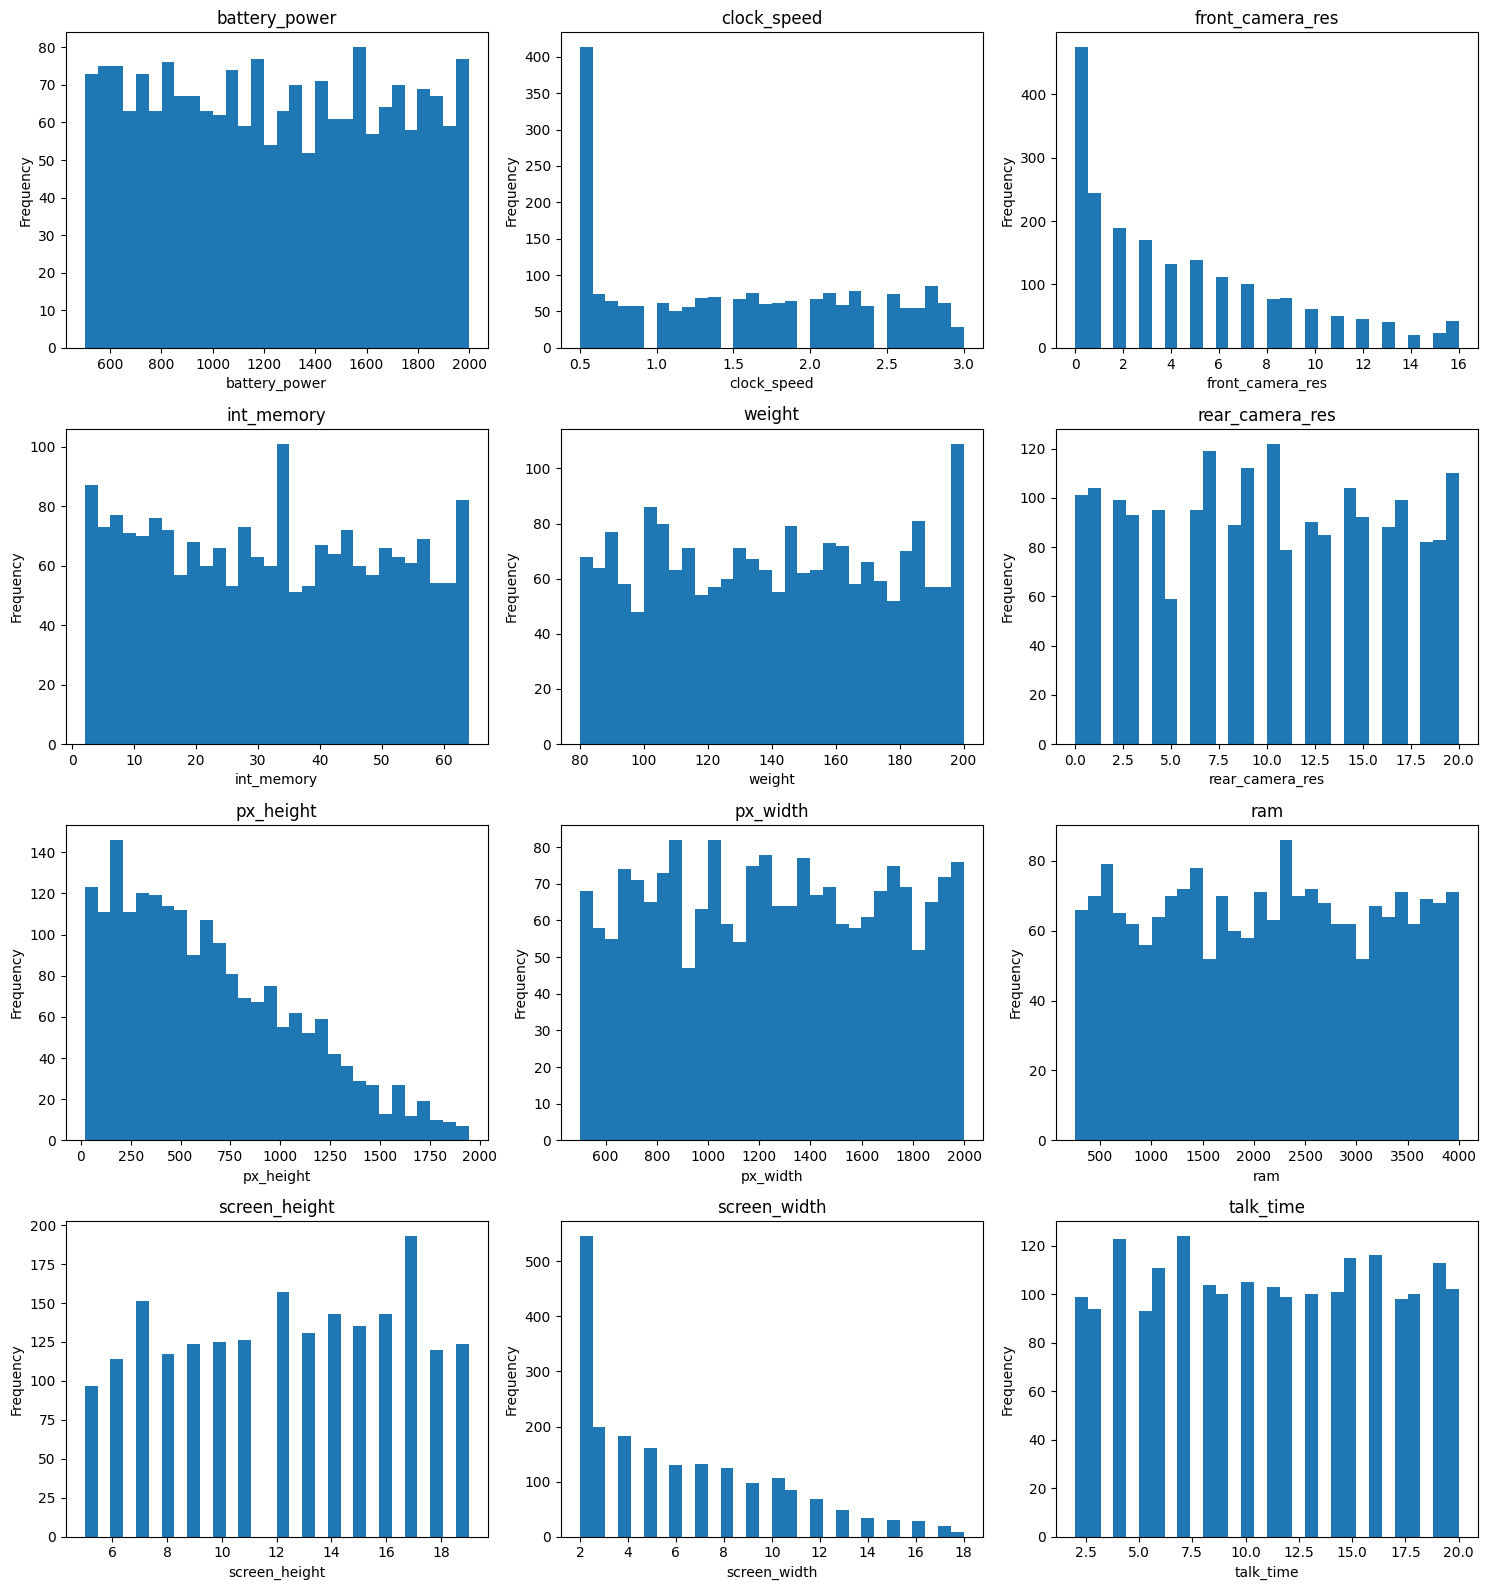

In [673]:
num_cols = train_data_mod.select_dtypes(include='number').columns.tolist()
cat_cols = likely_categorical.index.tolist()        # from your “likely_categorical” cell
cont_cols = [c for c in num_cols if c not in cat_cols + ['price_range']]

# layout: 3 plots per row
n_cols = 3
n_rows = (len(cont_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

for ax, col in zip(axes, cont_cols):
    ax.hist(train_data_mod[col].dropna(), bins=30)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# turn off any unused subplots
for ax in axes[len(cont_cols):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


# Esto es lo que nos dicen estos histogramas univariados de un vistazo:

- Distribuciones casi uniformes
battery_power, weight, talk_time están repartidos de forma casi plana a lo largo de sus rangos, sin necesidad aparente de transformaciones.

- Agrupaciones discretas / variables ordinales
clock_speed sólo toma unos pocos valores (0.5, 1.0, … 3.0 GHz), puede ser tratado como ordinal en el modelo

- Inflación de ceros
front_camera_res tiene una barra muy alta en 0 px que probablemente significa que el dispositivo no tiene cámara frontal. Se propone hacer una columna binaria nueva, 'font_camera_present', que codifique los dispositivos que no tienen camara para enriquecer el dataset

- Variables con sesgo a la derecha
px_height, screen_width presentan colas largas a la derecha debido a presencia de valores irrealistas (ej, px_height de 0), se considerara una transformación log(x+1) para controlar las colas, o hacer feature engineering incluyendo una nueva columna de 'aspect ratio' que nos ayude a determinar los valores adecuados

- Sin valores atípicos extremos
Ya que el analicis de atipicos fue hecho, todos los valores están dentro de rangos realistas

# Matriz de Correlacion

<Axes: >

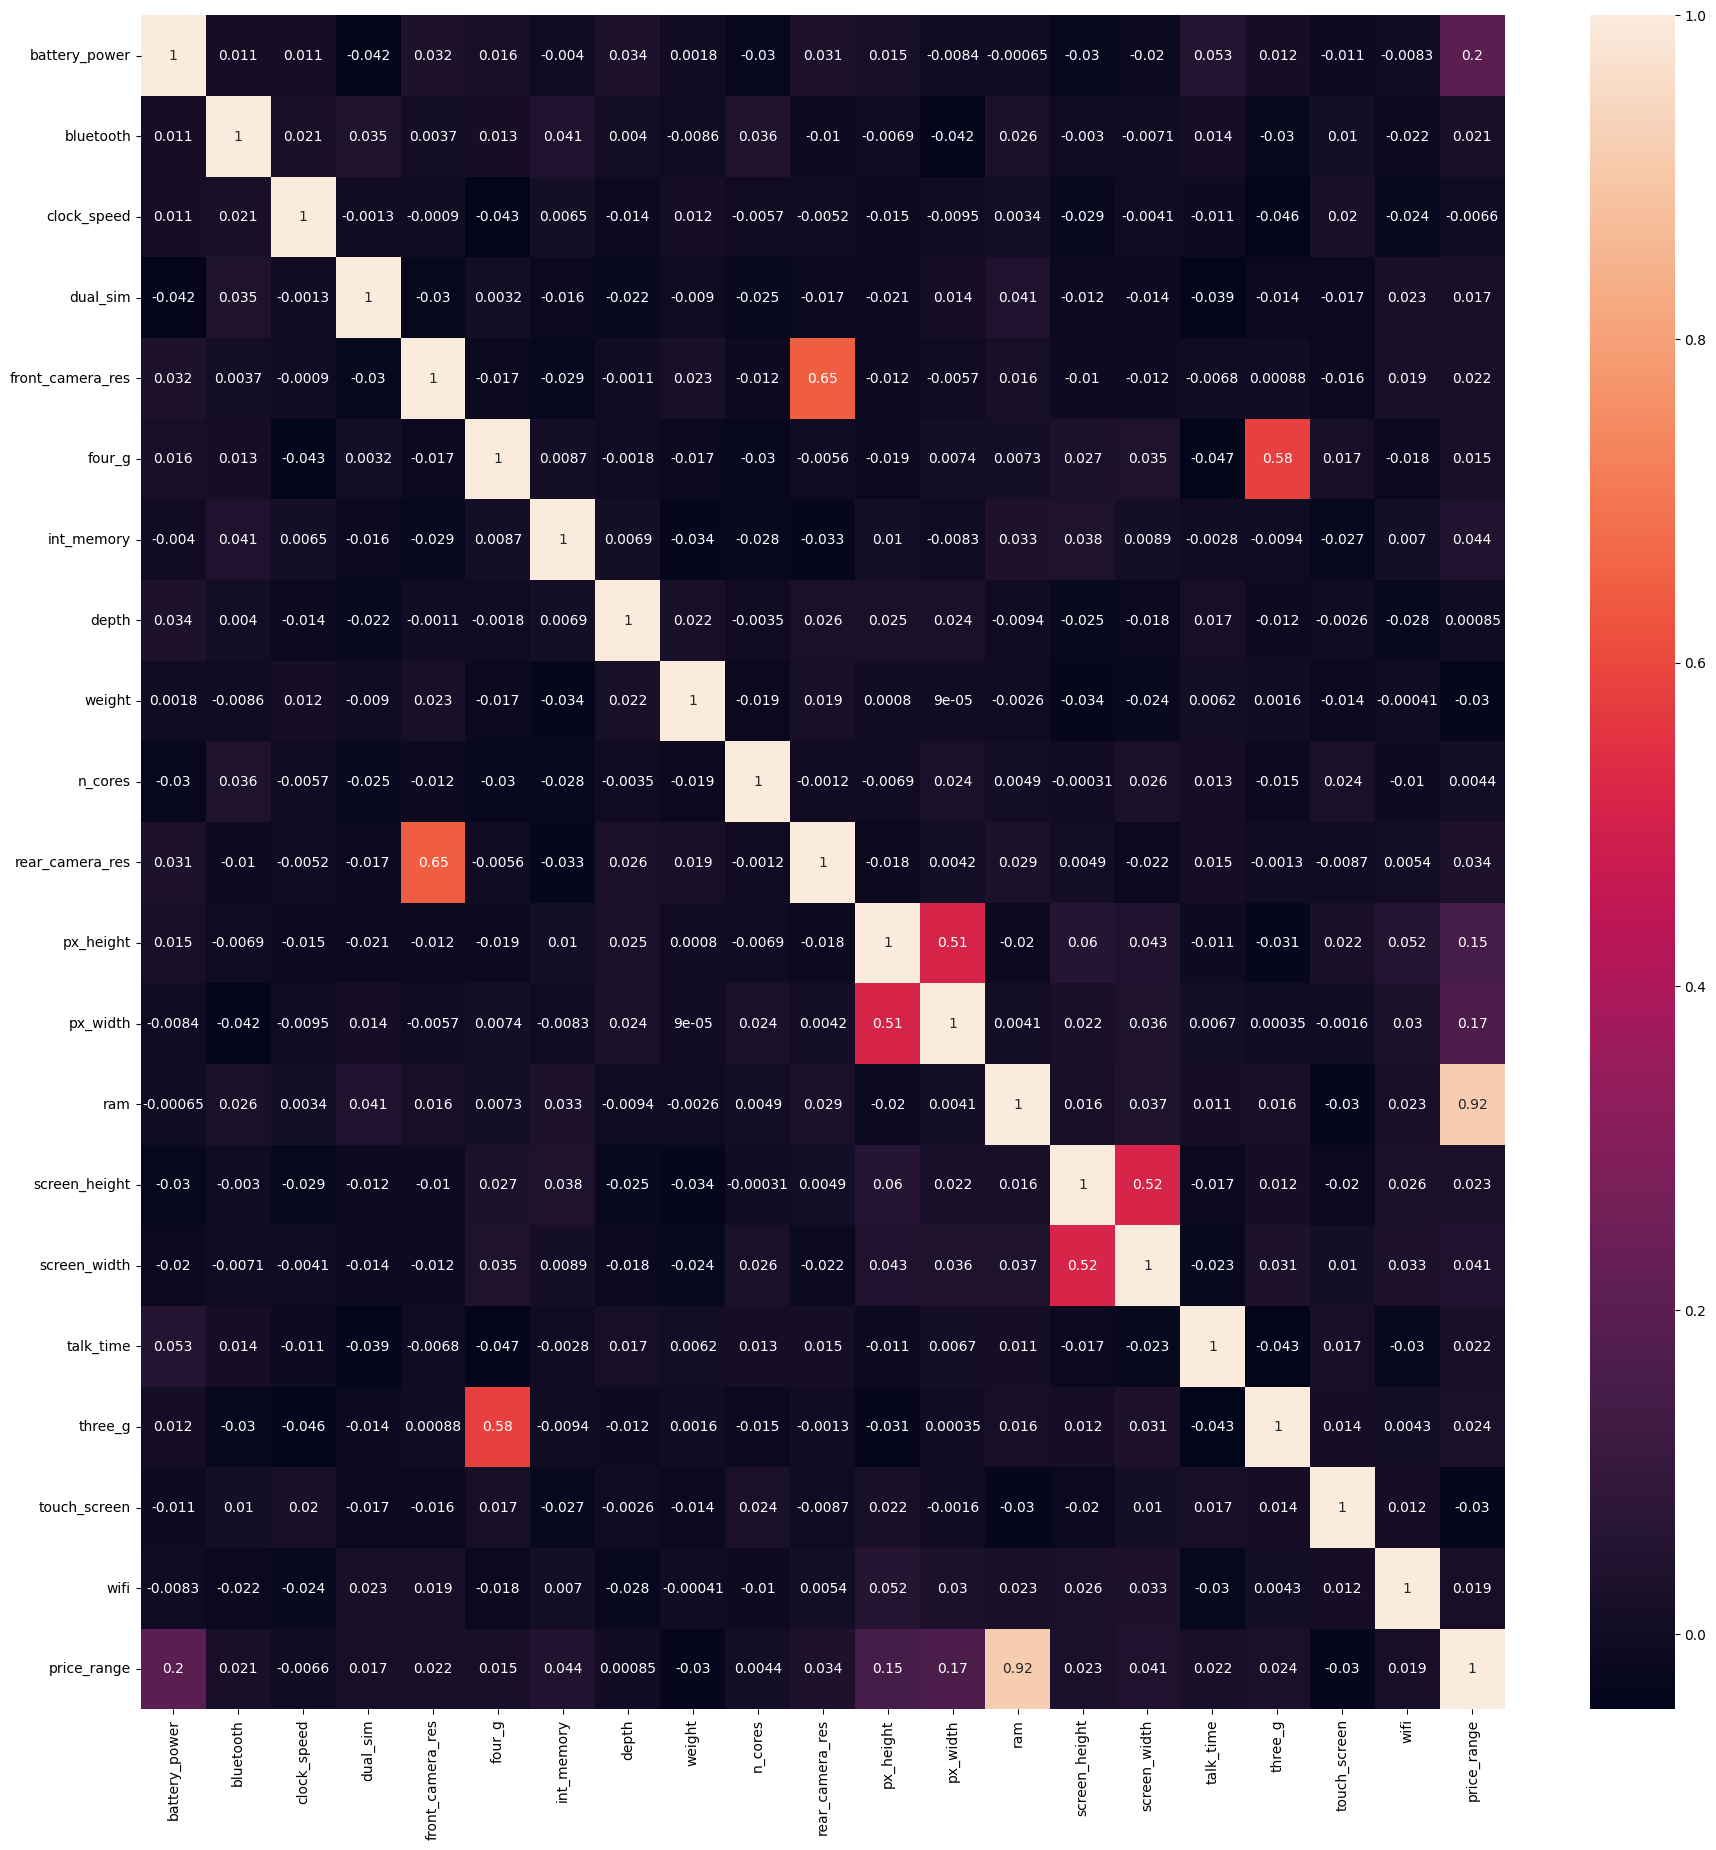

In [674]:
matriz_correlacion = train_data_mod.corr(numeric_only=True)
plt.figure(figsize=(22,22))
sns.heatmap(matriz_correlacion, annot=True)

# Resultados de mapa de calor
Considerando que el variable a predecir es la categoria de Precio del telefono celular (price_range), podemos apreciar que:
- Hay 3 columnas de muy baja correlancia:
 clock_speed, n_cores y depth, que indica que caracteristicas de la CPU como clock_speed y numero de cerebros no tiene tanto peso al predecir el precio

# Nuestro top 10 features son:
- ram	0.92
- battery_power	0.20
- px_width	0.17
- px_height	0.15
- int_memory	0.044
- screen_width	0.039
- rear_camera_res	0.034
- weight = -0.03
- otuch_screen = -0.03
- three_g	0.024


# Comparacion del top feature Vs target feature
Con este boxplot podemos visualizar como la columna con mayor valor de correlancia se distribuye ante las categorias de nuestro target variable (price_range)

<Axes: xlabel='price_range', ylabel='ram'>

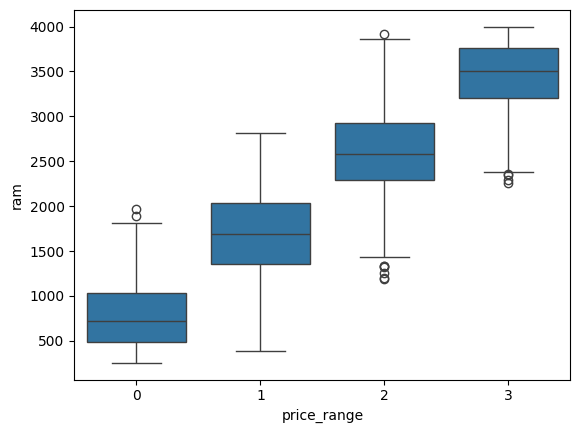

In [675]:
sns.boxplot(x='price_range', y='ram', data=train_data_mod)

# Binarizamos la columna de front_camera_present

In [676]:
train_data_mod["front_camera_present"] = (train_data_mod["front_camera_res"] > 0).astype(int)
print(train_data_mod["front_camera_present"].value_counts())

front_camera_present
1    1526
0     474
Name: count, dtype: int64


# Realizamos feature engineering
Creamos nuevas columnas px_aspect_ratio y screen_aspect_ratio

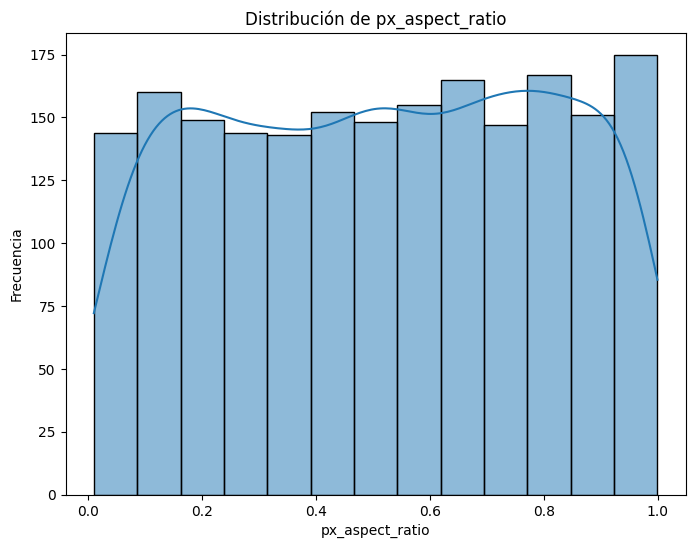

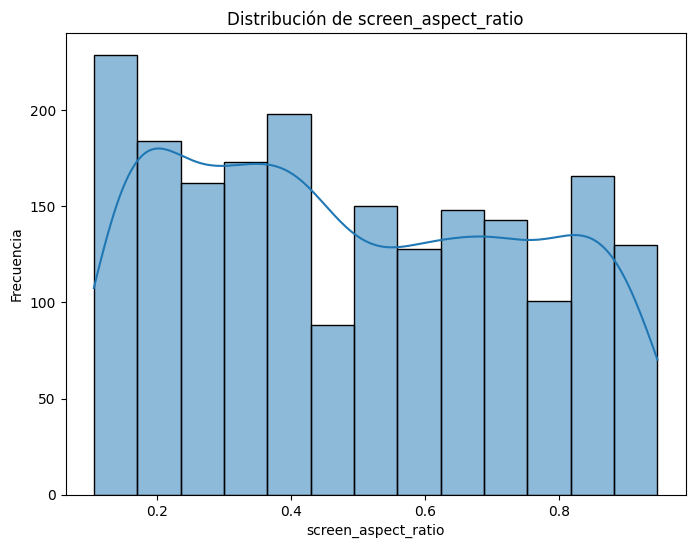

In [677]:
# Avoid division by zero → set AR = NaN where screen_width == 0
train_data_mod["screen_aspect_ratio"] = np.where(
    train_data_mod["screen_height"] == 0, np.nan, train_data_mod["screen_width"] / train_data_mod["screen_height"]
)
train_data_mod["px_aspect_ratio"] = np.where(
    train_data_mod["px_width"] == 0, np.nan, train_data_mod["px_height"] / train_data_mod["px_width"]
)
train_data_mod.head()
# Visualización de 'px_aspect_ratio'
plt.figure(figsize=(8, 6))
sns.histplot(train_data_mod['px_aspect_ratio'], kde=True)
plt.title('Distribución de px_aspect_ratio')
plt.xlabel('px_aspect_ratio')
plt.ylabel('Frecuencia')
plt.show()# Visualización de 'screen_aspect_ratio'
plt.figure(figsize=(8, 6))
sns.histplot(train_data_mod['screen_aspect_ratio'], kde=True)
plt.title('Distribución de screen_aspect_ratio')
plt.xlabel('screen_aspect_ratio')
plt.ylabel('Frecuencia')
plt.show()

Descubrimos que las medidas de screen_height pertenecian a screen_width y viceversa, ya que la data mide la pantalla desde su posicion "Landscape" .
Ajustamos a como calculamos screen_aspect_ratio

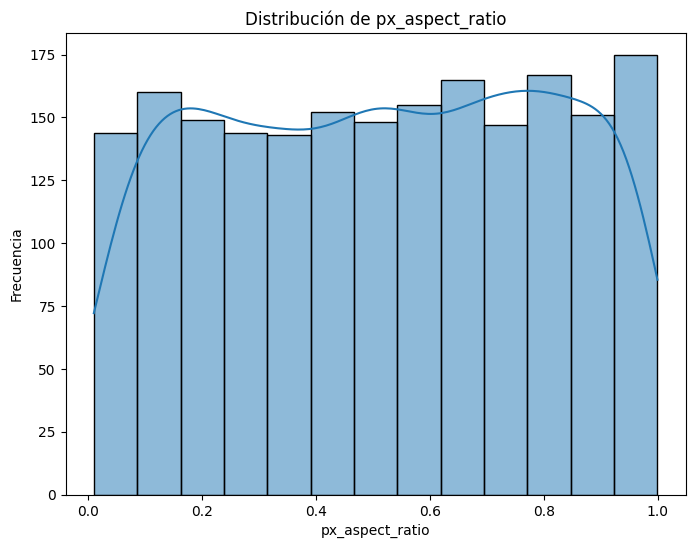

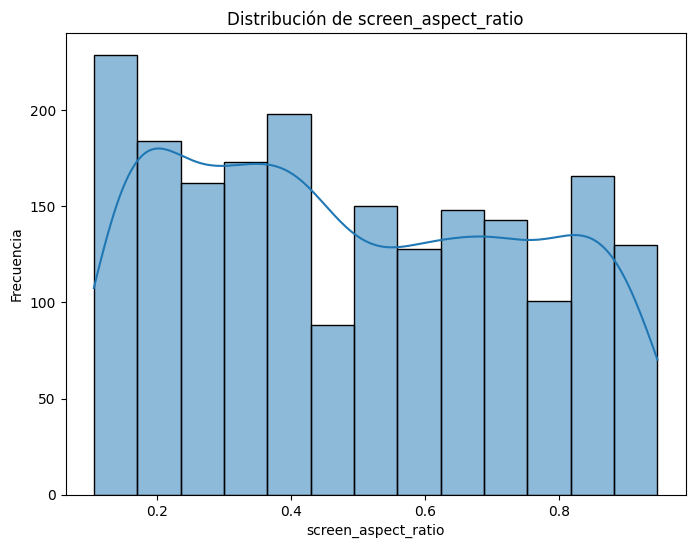

In [678]:
train_data_mod["screen_aspect_ratio"] = np.where(
    train_data_mod["screen_height"] == 0, np.nan, train_data_mod["screen_width"] / train_data_mod["screen_height"]
)
train_data_mod["px_aspect_ratio"] = np.where(
    train_data_mod["px_width"] == 0, np.nan, train_data_mod["px_height"] / train_data_mod["px_width"]
)

# Visualización de 'px_aspect_ratio'
plt.figure(figsize=(8, 6))
sns.histplot(train_data_mod['px_aspect_ratio'], kde=True)
plt.title('Distribución de px_aspect_ratio')
plt.xlabel('px_aspect_ratio')
plt.ylabel('Frecuencia')
plt.show()# Visualización de 'screen_aspect_ratio'
plt.figure(figsize=(8, 6))
sns.histplot(train_data_mod['screen_aspect_ratio'], kde=True)
plt.title('Distribución de screen_aspect_ratio')
plt.xlabel('screen_aspect_ratio')
plt.ylabel('Frecuencia')
plt.show()

# Preparamos entrenamiento
Split de 80% entrenamiento, 20% test

In [679]:
x = train_data_mod.drop("price_range", axis=1)
y = train_data_mod["price_range"]

In [680]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Estandarizamos con StandardScaler

In [681]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Ajustamos PCA

In [682]:
pca = PCA(n_components=0.95, random_state=42)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca  = pca.transform(x_test_scaled)

# Selección Univariada de Características
Se realiza la selección de las variables más relevantes para el modelo utilizando métodos univariados:
* Se identifican las columnas numéricas y categóricas (binarias), y se extraen sus índices dentro del conjunto escalado.
* Se aplica ANOVA F-test (f_classif) sobre las variables numéricas ya estandarizadas para seleccionar las 8 más informativas.
* Se aplica Chi-cuadrado sobre las variables binarias sin escalar para identificar las 3 más dependientes de la variable objetivo.
* se concatenan las variables seleccionadas de ambos grupos para formar un nuevo conjunto reducido de características, listo para el entrenamiento.

In [683]:
# Listas de nombres
num_cols = [
    "battery_power", "clock_speed", "int_memory", "depth", "weight", "n_cores",
    "rear_camera_res", "px_height", "px_width", "ram", "screen_height", "screen_width",
    "talk_time"
]
cat_cols = ["bluetooth", "dual_sim", "four_g", "three_g", "touch_screen", "wifi"]

# Lista completa de columnas en x_train
all_feature_names = x_train.columns.tolist()

# Indices dentro del array escalado para cada grupo
num_indices = [ all_feature_names.index(col) for col in num_cols ]
cat_indices = [ all_feature_names.index(col) for col in cat_cols ]

# Extrae solo las columnas numéricas
x_train_num_scaled = x_train_scaled[:, num_indices]
x_test_num_scaled  = x_test_scaled[:,  num_indices]

# Para chi2, extrae las columnas binarias sin escalar
x_train_bin = x_train[cat_cols].values   # forma: (n_train, 6), valores estrictamente 0 o 1
x_test_bin  = x_test[cat_cols].values    # forma: (n_test,  6), valores 0 o 1

# SelectKBest sobre variables numéricas con ANOVA F
selector_num = SelectKBest(score_func=f_classif, k=8)
x_train_num_sel = selector_num.fit_transform(x_train_num_scaled, y_train)
x_test_num_sel  = selector_num.transform(x_test_num_scaled)

print("Top 8 numéricas según ANOVA F:")
for idx in selector_num.get_support(indices=True):
    print(f"  • {num_cols[idx]} (score = {round(selector_num.scores_[idx], 2)})")

# SelectKBest sobre variables binarias con Chi cuadrado
selector_cat = SelectKBest(score_func=chi2, k=3)
x_train_cat_sel = selector_cat.fit_transform(x_train_bin, y_train)
x_test_cat_sel  = selector_cat.transform(x_test_bin)

print("\nTop 3 binarias según Chi²:")
for idx in selector_cat.get_support(indices=True):
    print(f"  • {cat_cols[idx]} (score = {round(selector_cat.scores_[idx], 2)})")

# Concatenar numéricas + binarias seleccionadas
x_train_scaled_sel = np.hstack([x_train_num_sel, x_train_cat_sel])
x_test_scaled_sel  = np.hstack([x_test_num_sel,  x_test_cat_sel])

print("\nForma final x_train tras C.2:", x_train_scaled_sel.shape)
print("Forma final x_test  tras C.2:", x_test_scaled_sel.shape)


Top 8 numéricas según ANOVA F:
  • battery_power (score = 23.08)
  • int_memory (score = 4.98)
  • weight (score = 3.2)
  • n_cores (score = 1.6)
  • px_height (score = 14.08)
  • px_width (score = 16.18)
  • ram (score = 2760.07)
  • screen_height (score = 2.07)

Top 3 binarias según Chi²:
  • bluetooth (score = 1.25)
  • four_g (score = 1.14)
  • touch_screen (score = 1.85)

Forma final x_train tras C.2: (1600, 11)
Forma final x_test  tras C.2: (400, 11)


# Regresion Logistica

In [684]:
logreg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=500, random_state=42)
logreg.fit(x_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42)

In [685]:
y_predicho = logreg.predict(x_test_scaled)


In [686]:
mse = mean_squared_error(y_test, y_predicho)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0275


In [687]:
r2 = r2_score(y_test, y_predicho)
print("R-squared:", r2)

R-squared: 0.9793890733983202


In [688]:
print("Accuracy:", accuracy_score(y_test, y_predicho))
print(classification_report(y_test, y_predicho))

Accuracy: 0.9725
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       105
           1       0.93      0.99      0.96        91
           2       0.99      0.95      0.97        92
           3       0.98      0.99      0.99       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



# Cross-Validation con 5 Pliegues
Para evaluar la estabilidad del modelo de regresión logística. Se reportan los resultados por pliegue y el promedio final.

In [689]:
logreg = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=500,
    random_state=42
)
cv_scores = cross_val_score(logreg, x_train_scaled, y_train, cv=5, scoring="accuracy")
print("5-fold CV accuracy:", cv_scores, "→ mean", cv_scores.mean())


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


5-fold CV accuracy: [0.953125 0.95     0.946875 0.925    0.9625  ] → mean 0.9475000000000001


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

# Selección de Características con RFE

In [690]:
# Selección con RFE
# Definimos la regresión logística
base_estimator = LogisticRegression(multi_class="multinomial", solver="lbfgs",
                                   max_iter=500, random_state=42)

# Creamos RFE pidiendo 5 variables
rfe = RFE(estimator=base_estimator, n_features_to_select=5, step=1, verbose=1)

# Ajustamos RFE sobre x_train_scaled_sel (1600 x 11)
rfe.fit(x_train_scaled_sel, y_train)

# Reconstruimos la lista de nombres seleccionados
mask_rfe = rfe.support_
sel_rfe_names = [name for name, keep in zip(final_feature_names, mask_rfe) if keep]

print("\n--- Variables seleccionadas por RFE (Wrapper) ---")
for n in sel_rfe_names:
    print("  •", n)

# Creamos la sub-matriz con esas 5 columnas
sel_indices = [ final_feature_names.index(n) for n in sel_rfe_names ]
x_train_rfe = x_train_scaled_sel[:, sel_indices]
x_test_rfe  = x_test_scaled_sel[:,  sel_indices]

print("\nx_train_rfe shape:", x_train_rfe.shape)  # (1600,5)

Fitting estimator with 11 features.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.

--- Variables seleccionadas por RFE (Wrapper) ---
  • battery_power
  • weight
  • px_height
  • px_width
  • ram

x_train_rfe shape: (1600, 5)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


RF (solo top 5 RFE) → Accuracy: 0.935


# Entrenamiento con las 5 Variables Seleccionadas (RFE)

In [ ]:
rf_rfe = RandomForestClassifier(n_estimators=200, random_state=42)
rf_rfe.fit(x_train_rfe, y_train)
y_pred_rfe = rf_rfe.predict(x_test_rfe)

print("RF (solo top 5 RFE) → Accuracy:", accuracy_score(y_test, y_pred_rfe))

# Optimización de Hiperparámetros con GridSearchCV

In [691]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(x_train_rfe, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(x_test_rfe)

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9087500000000001

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       105
           1       0.89      0.96      0.92        91
           2       0.89      0.86      0.87        92
           3       0.95      0.93      0.94       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



# Matriz de Confusión del Modelo Optimizado

<Figure size 600x600 with 0 Axes>

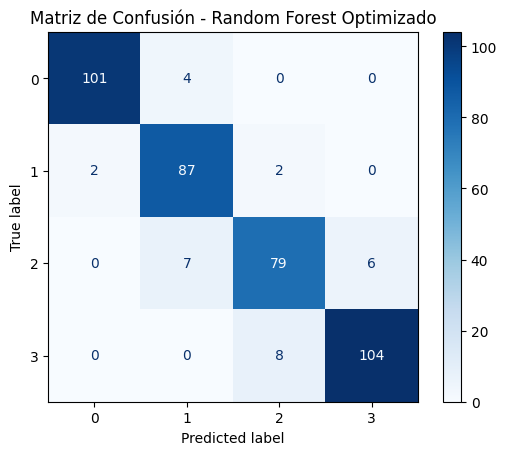

In [692]:
y_pred = best_rf.predict(x_test_rfe)

# Plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)

plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusión - Random Forest Optimizado")
plt.grid(False)
plt.show()
